In [72]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [73]:
import numpy as np
import pandas as pd

In [74]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [75]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [76]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [77]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [78]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [79]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [80]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [81]:
otherFirstRow.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b3a82cdcc8>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [206]:
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b3a8b03388>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [247]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
from sqlalchemy import and_
first_row = session.query(Climate).first()
otherFirstRow=session.query(Station).first()

last12Months=session.query(Climate.date, Climate.prcp).\
    filter(and_(Climate.date > '2016-08-23', Climate.date<'2017-08-23')).\
    order_by(Climate.date).all()
 

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
lastYear=pd.DataFrame({'Tuple Column': last12Months})
# Sort the dataframe by date
lastYear[['Date', 'Rain Volume']] = pd.DataFrame(lastYear['Tuple Column'].tolist(), index=lastYear.index) 

# Use Pandas Plotting with Matplotlib to plot the data


In [249]:
del lastYear['Tuple Column']

In [251]:
lastYear.set_index('Date', inplace=True)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text xticklabel objects>)

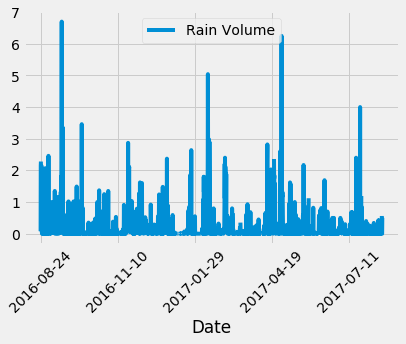

In [256]:
lastYear.plot()
plt.xticks(rotation=45)

In [257]:
# Use Pandas to calcualte the summary statistics for the precipitation data
lastYear['Rain Volume'].describe()

count    2011.000000
mean        0.176549
std         0.460667
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Rain Volume, dtype: float64

In [295]:
# Design a query to show how many stations are available in this dataset?
session.query(Climate.station).\
    order_by(Climate.station).distinct().all()

[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [318]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
from sqlalchemy import desc
session.query(Climate.station, func.count(Climate.station)).\
    order_by(desc(func.count(Climate.station))).\
    group_by(Climate.station).all()
    

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [327]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
minimumTemp=session.query(Climate.station, func.min(Climate.tobs)).\
    filter(Climate.station == 'USC00519281').all()
maximumTemp=session.query(Climate.station, func.max(Climate.tobs)).\
    filter(Climate.station == 'USC00519281').all()
avgTemp=session.query(Climate.station, func.avg(Climate.tobs)).\
    filter(Climate.station == 'USC00519281').all()

In [343]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prevYearQuery=session.query(Climate.station, Climate.tobs).\
    filter(Climate.station=='USC00519281').all()
prevYear=pd.DataFrame({'Tuples Column': prevYearQuery })

In [344]:
prevYear[['Station ID', 'Rain Volume']] = pd.DataFrame(prevYear['Tuples Column'].tolist(), index=prevYear.index) 

In [345]:
del prevYear['Tuples Column']

In [347]:
del prevYear['Station ID']

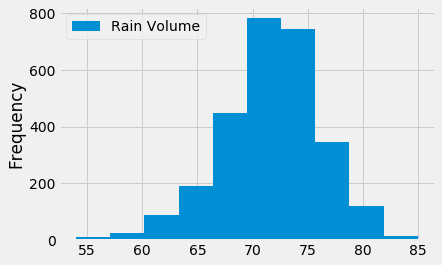

In [350]:
prevYear.plot(kind='hist')

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
